#  Employee Performance Analysis - INX Future Inc

# Project Summary

The Data science project which is given here is an analysis of employee performance form INX Furture Inc. The project goal is to find the performance rating of the employees from each feature of their data such as total work experience, gender, department, current role..etc. The Goal and Insights of the project as follows,

1. Department wise performances
2. Top 3 Important Factors affecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

The given data of employees has the 1200 data to perform a higher level machine learning where it is well structured. The features present in the data are 28 in total. The Shape of the data is 1200x28. The 28 features are classified into quantitative and qualitative where 16 features are qualitative and 11 features are quantitative. The employee ID data is alphanumerical data which doesn't play a role as a relevant feature for performance rating.

The dataset is a complete labelled data and categorical which decides the machine learning algorithm to be used. The important aspects of the data are depending on the correlation of data between features and performance rating. The analysis of the project has gone through the stage of distribution analysis, correlation analysis and analysis by each department to satisfy the project goal.

The machine learning model which is used in this project is random forest classifier and gradient boosted classifier which predicted the nearby higher accuracy of 92%. Since it is categorical labelled data, it has to go through the classifier machine learning techniques which will be suitable for this structured data. The numerical features are the most relevant in the model according to correlation technique. 

One of the goals of this project is to find the important feature affecting the performance rating. The important features were predicted using the machine learning model feature importance technique.  The main technique used in the preprocessing data using the one hot encoding method to convert the string-categorical data into numerical data, because, the most of machine learning methods are based on numerical methods where strings are not supportive. The overall project was performed and achieved the goals by using the machine learning model and visualization techniques. 

<brc>

Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import the datafile

In [2]:
data=pd.read_excel('INX_Future_Inc.xls')

Check the info and head and correlation of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [4]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
gt=data.groupby(['EmpDepartment'])['PerformanceRating'].value_counts()

In [6]:
gt

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [7]:
data.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


removing the employeeid column

In [8]:
data.drop('EmpNumber',axis=1,inplace=True)

# EDA
 Now let us check some plots to see the relations between the plots

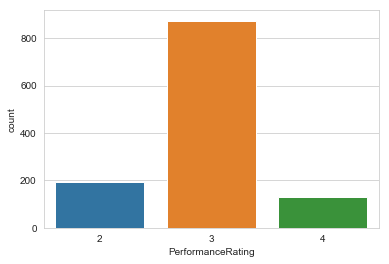

In [9]:
sns.countplot('PerformanceRating',data=data)

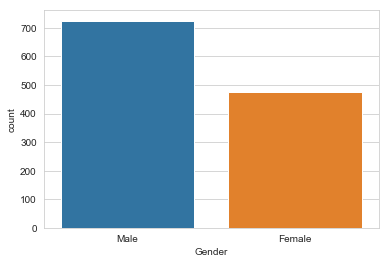

In [10]:
sns.countplot('Gender',data=data)

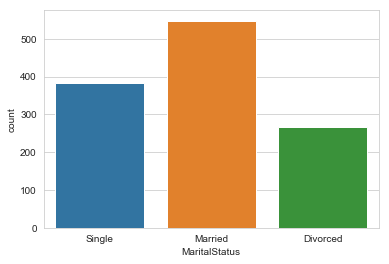

In [11]:
sns.countplot('MaritalStatus',data=data)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

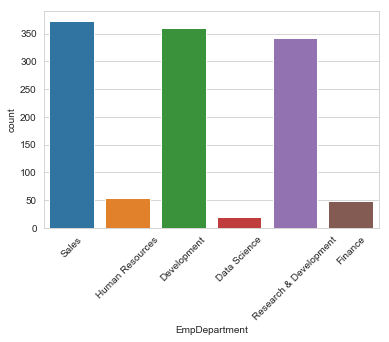

In [12]:
sns.countplot('EmpDepartment',data=data)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

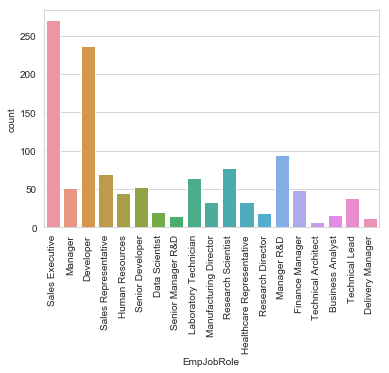

In [13]:
sns.countplot('EmpJobRole',data=data)
plt.xticks(rotation=90)

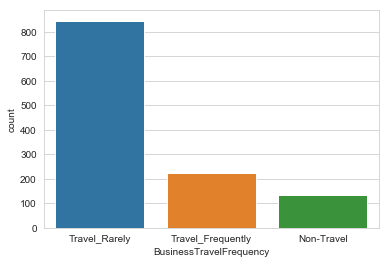

In [14]:
sns.countplot('BusinessTravelFrequency',data=data)

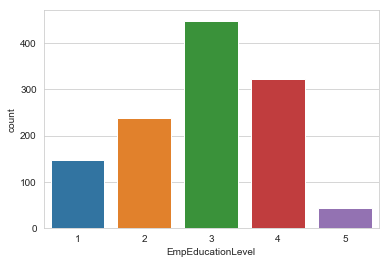

In [15]:
sns.countplot('EmpEducationLevel',data=data)

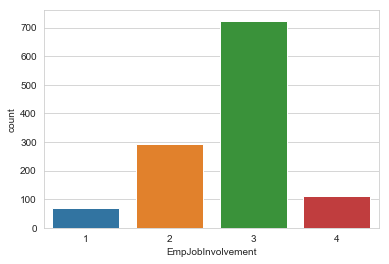

In [16]:
sns.countplot('EmpJobInvolvement',data=data)

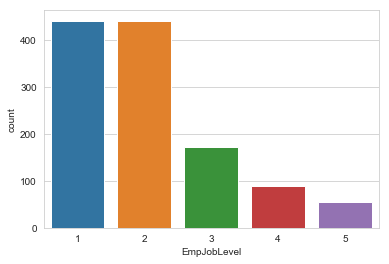

In [17]:
sns.countplot('EmpJobLevel',data=data)

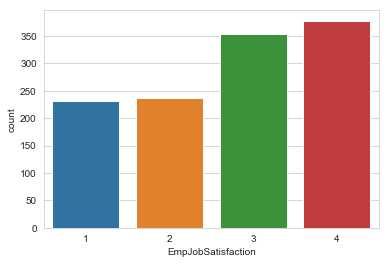

In [18]:
sns.countplot('EmpJobSatisfaction',data=data)

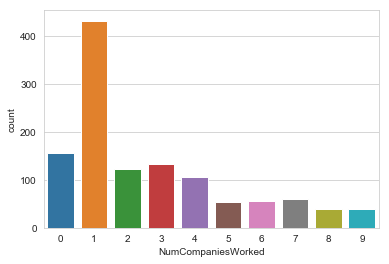

In [19]:
sns.countplot('NumCompaniesWorked',data=data)

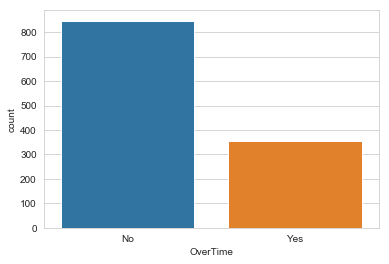

In [20]:
sns.countplot('OverTime',data=data)

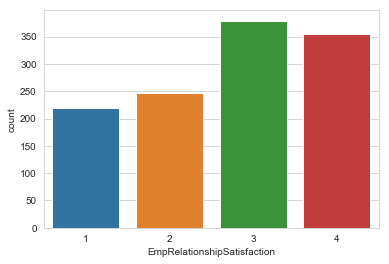

In [21]:
sns.countplot('EmpRelationshipSatisfaction',data=data)

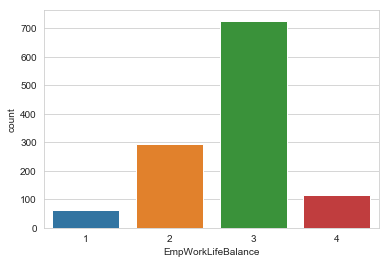

In [22]:
sns.countplot('EmpWorkLifeBalance',data=data)

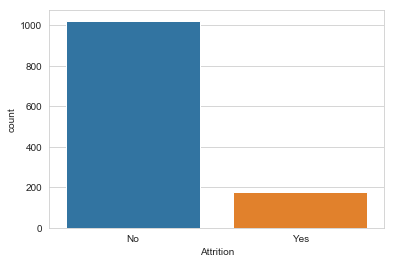

In [23]:
sns.countplot('Attrition',data=data)

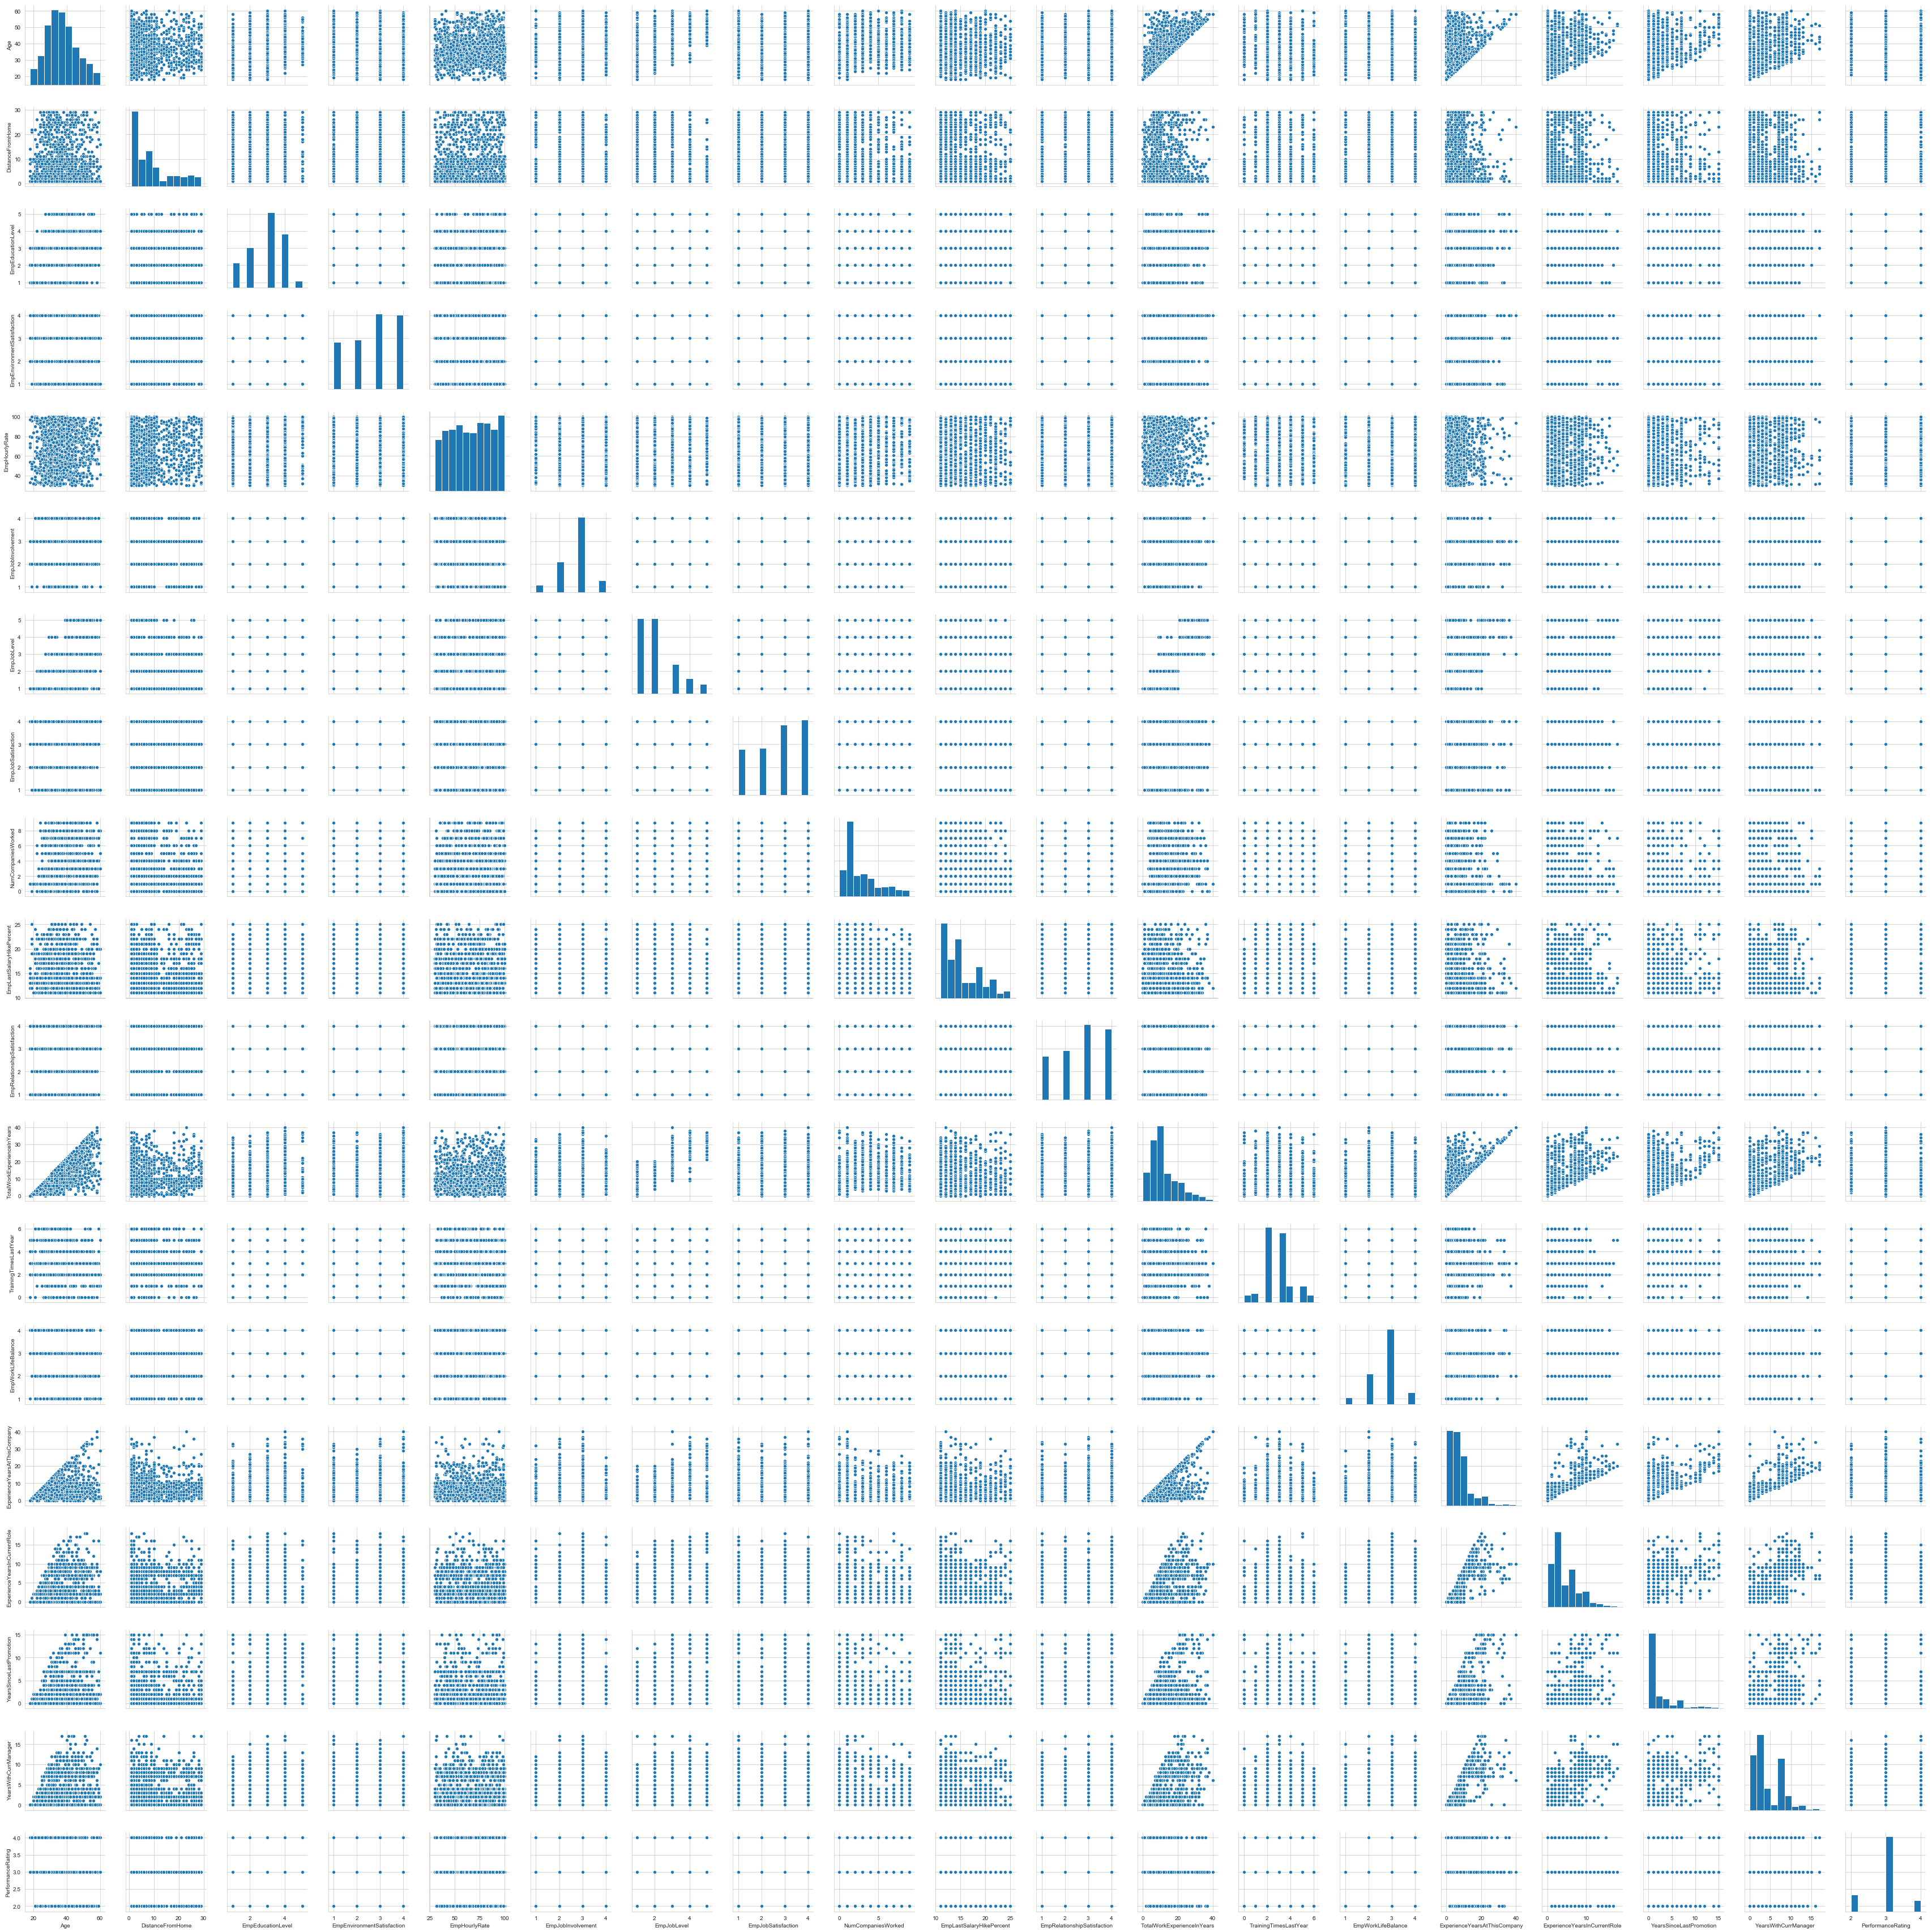

In [24]:
sns.pairplot(data)

In [25]:
# Let us check what are the categorical columns and what are the numerical columns
num_cols=data._get_numeric_data().columns
cols=data.columns

In [26]:
cat_cols=list(set(cols)-set(num_cols))

In [27]:
cat_cols

['Gender',
 'Attrition',
 'EducationBackground',
 'EmpDepartment',
 'EmpJobRole',
 'OverTime',
 'BusinessTravelFrequency',
 'MaritalStatus']

In [28]:
num_cols

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

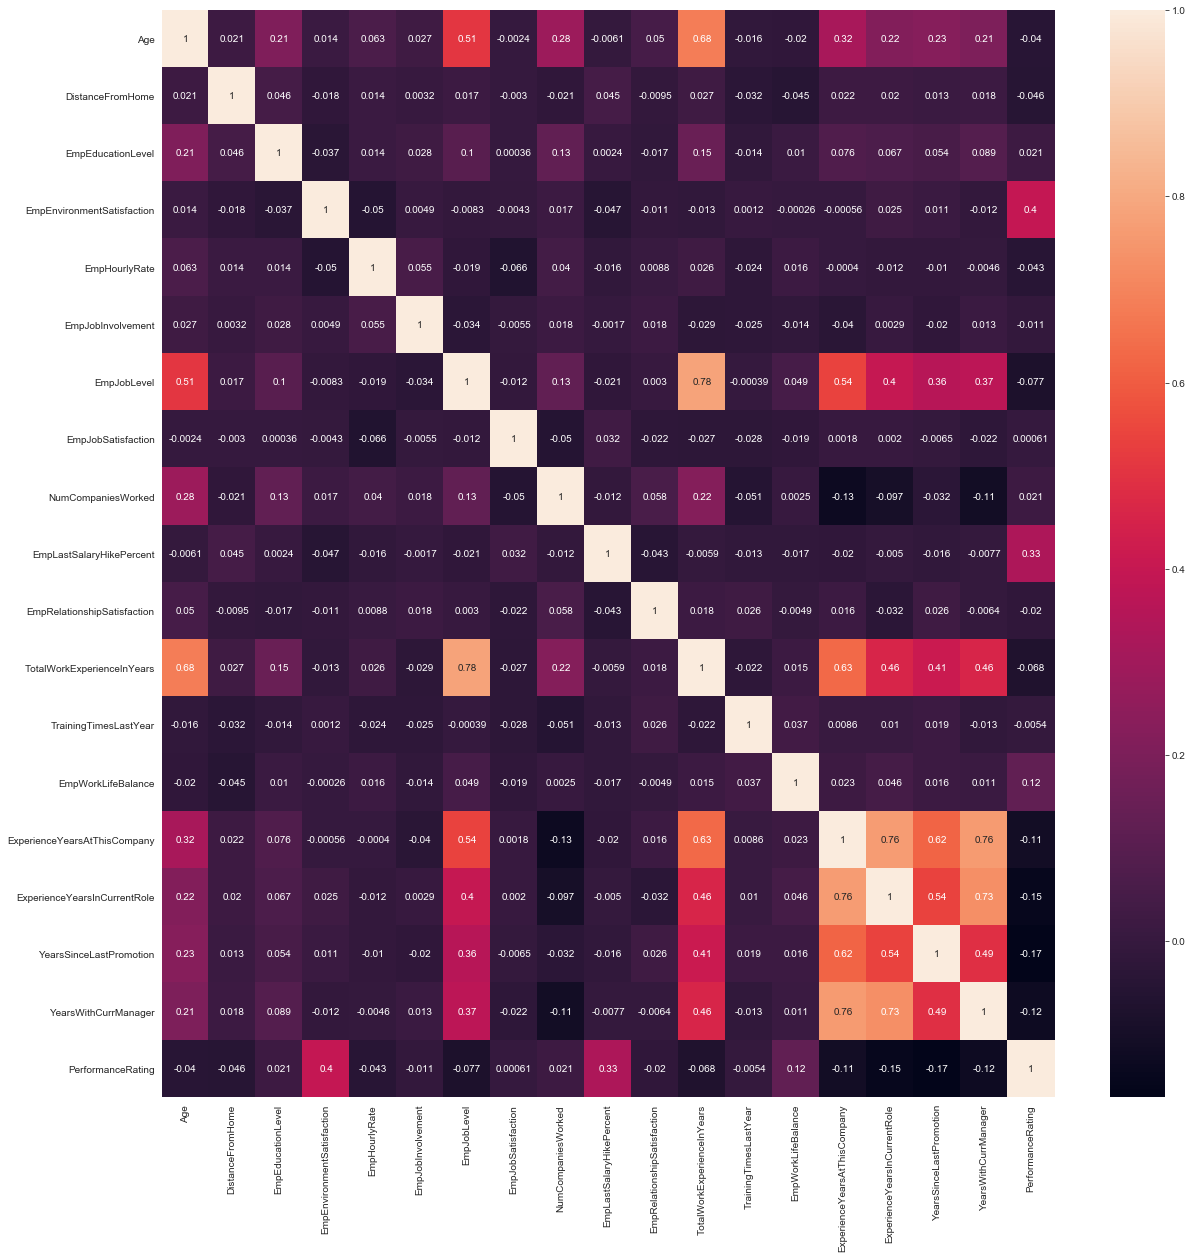

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

First let us convert the categorical columns using onehotencoding.

In [30]:
df=pd.get_dummies(data,drop_first=True)

In order to know which are the useful columns and which are not let us conduct a chi2 test between inputs and outputs

# Chi2

In [31]:
#from sklearn.feature_selection import chi2

In [32]:
#temp=chi2(data.drop('PerformanceRating',axis=1),data['PerformanceRating'])
#p=temp[1]<0.05

In [33]:
#p

Now in order to identify the columns with the corresponding p_value using a dictionary

In [34]:
#cols=data.columns
#d=dict(zip(cols,p))

In [35]:
#d

# Assigning input and output variables based on the above chi2 test

In [36]:
#x=data.drop('PerformanceRating',axis=1)
#y=data['PerformanceRating']

In [37]:
x=df.drop(['PerformanceRating','Age','EmpEducationLevel','EmpJobInvolvement','EmpJobSatisfaction',
             'NumCompaniesWorked','EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
            'Gender_Male','EducationBackground_Life Sciences','EducationBackground_Other','EducationBackground_Technical Degree',
            'MaritalStatus_Married','EmpDepartment_Finance','EmpDepartment_Human Resources','EmpDepartment_Sales',
            'EmpJobRole_Data Scientist','EmpJobRole_Finance Manager','EmpJobRole_Healthcare Representative',
            'EmpJobRole_Human Resources','EmpJobRole_Manager','EmpJobRole_Manager R&D','EmpJobRole_Manufacturing Director',
            'EmpJobRole_Sales Executive','EmpJobRole_Sales Representative','EmpJobRole_Senior Developer',
            'EmpJobRole_Senior Manager R&D','EmpJobRole_Technical Architect','EmpJobRole_Technical Lead',
            'BusinessTravelFrequency_Travel_Frequently','OverTime_Yes'],axis=1)
y=df['PerformanceRating']

In [38]:
x.columns

Index(['DistanceFromHome', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobLevel', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EducationBackground_Marketing', 'EducationBackground_Medical',
       'MaritalStatus_Single', 'EmpDepartment_Development',
       'EmpDepartment_Research & Development', 'EmpJobRole_Delivery Manager',
       'EmpJobRole_Developer', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Research Director', 'EmpJobRole_Research Scientist',
       'BusinessTravelFrequency_Travel_Rarely', 'Attrition_Yes'],
      dtype='object')

Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [41]:
#t=x_test['EmpDepartment']

# Building the model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# define the classifier
rfc=RandomForestClassifier(n_estimators=100)

# Training the model

In [44]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Checking the feature importances

Text(0.5, 0, 'Relative Importance')

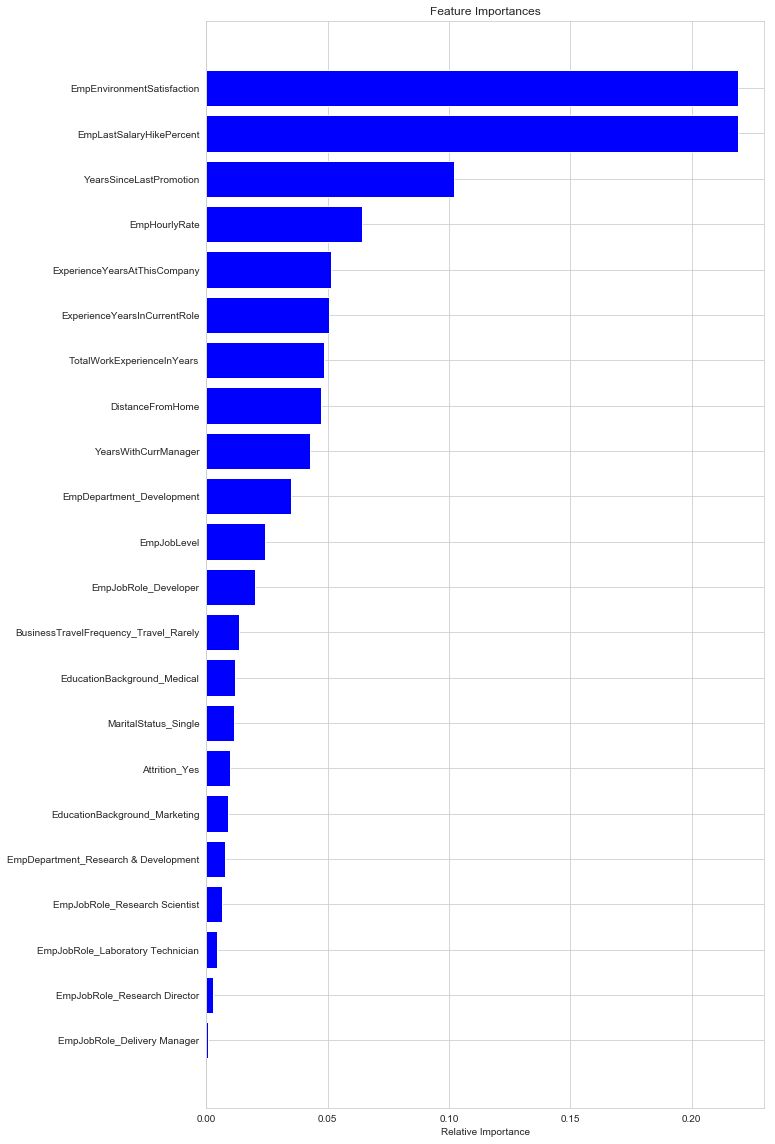

In [45]:
features=x.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Testing the model

In [46]:
predictions=rfc.predict(x_test)

# Evaluating the test predictions

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.89      0.82      0.85        39
           3       0.93      0.97      0.95       178
           4       0.94      0.74      0.83        23

    accuracy                           0.93       240
   macro avg       0.92      0.84      0.88       240
weighted avg       0.92      0.93      0.92       240



In [49]:
print(confusion_matrix(y_test,predictions))

[[ 32   7   0]
 [  4 173   1]
 [  0   6  17]]


In [50]:
print(accuracy_score(y_test,predictions))

0.925


# Now let us check the same for other classifiers using cross_val_score

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [52]:
mns=[]
stds=[]
clfs=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),
      ExtraTreesClassifier(n_estimators=100),AdaBoostClassifier(),MultinomialNB(),GradientBoostingClassifier()]
for i in clfs:
    cvs=cross_val_score(i,x,y,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
    mns.append(cvs.mean())
    stds.append(cvs.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [53]:
for i in range(len(mns)):
    print(clfs[i].__class__.__name__,':',mns[i]*100)

KNeighborsClassifier : 71.24625161267828
SVC : 72.91749189302277
DecisionTreeClassifier : 84.91146832176855
RandomForestClassifier : 92.65952439066913
ExtraTreesClassifier : 86.33408301079768
AdaBoostClassifier : 85.99864011994839
MultinomialNB : 64.34722851796322
GradientBoostingClassifier : 92.82967502353638


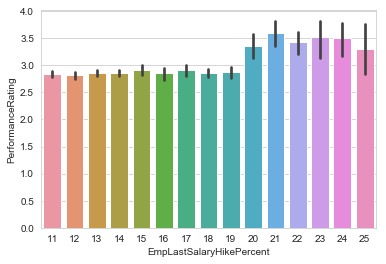

In [54]:
sns.barplot('EmpLastSalaryHikePercent','PerformanceRating',data=data)

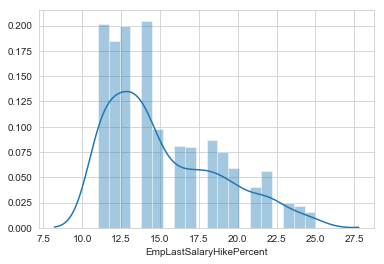

In [55]:
sns.distplot(data['EmpLastSalaryHikePercent'],bins=20)

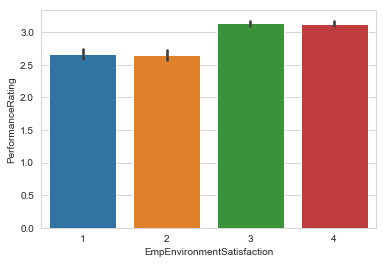

In [56]:
sns.barplot('EmpEnvironmentSatisfaction','PerformanceRating',data=data)

# Checking the Classification balance of the dataset

In [57]:
l=y_train.value_counts()

In [58]:
print("Before OverSampling, counts of label '2': {}",l[2]) 
print("Before OverSampling, counts of label '3': {} ",l[3])
print("Before OverSampling, counts of label '4': {}",l[4]) 


Before OverSampling, counts of label '2': {} 155
Before OverSampling, counts of label '3': {}  696
Before OverSampling, counts of label '4': {} 109


# Now Applying SMOTE to see the data get a bit balanced

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm=SMOTE(random_state=101)

In [61]:
x_train,y_train=sm.fit_sample(x_train,y_train)

In [62]:
print("After OverSampling, counts of label '2': {}".format(sum(y_train == 2))) 
print("After OverSampling, counts of label '3': {} ".format(sum(y_train == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train == 4))) 

After OverSampling, counts of label '2': 696
After OverSampling, counts of label '3': 696 
After OverSampling, counts of label '4': 696


Now once again apllying the model

In [63]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
predictions=rfc.predict(x_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.84      0.82      0.83        39
           3       0.94      0.94      0.94       178
           4       0.79      0.83      0.81        23

    accuracy                           0.91       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.91      0.91      0.91       240



In [66]:
print(confusion_matrix(y_test,predictions))

[[ 32   7   0]
 [  6 167   5]
 [  0   4  19]]


* As you can see that accuracy may have fallen down but the recall and f1 score of the model has been decreased so we do not need the SMOTE for this dataset

# Conclusion

From the above analysis we can conclude by summarizing the goals defined at the business statement

1. For the first statement of which departments are performing good is shown in the bar plot below.

2. The three most important factors that influence on the performance rating according to the observations made are 
    
    i) Employee last year hike percentage
    
    ii) Employee job satisfaction
    
    iii) Years since the last promotion

3. The model predicts the data with an accuracy of 92.9 and a f1 score over 93

4. There are many factors present which may also hold an importance more than that of the top most influential factors for a particular set of datapoints. So we can either work on the columns which are strongly influential or on those terms which are on the other end of the spectrum. As you can see from the analysis shown above from the visualization to the model building we can see and form the relations between the columns and infer it on the same.



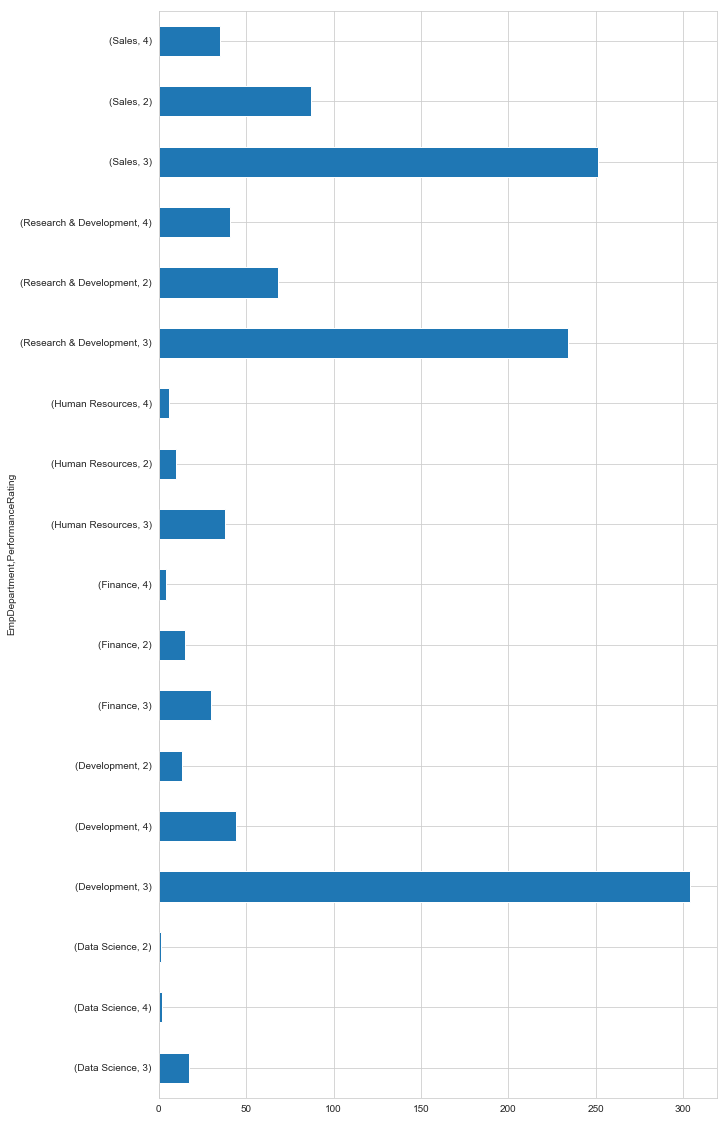

In [67]:
plt.figure(figsize=(10,20))
data.groupby(['EmpDepartment']).PerformanceRating.value_counts().plot.barh()

In [68]:
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [69]:
data.groupby(['EmpDepartment']).PerformanceRating.value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

 From this you can see the Performance Rating of the Departments as you can see that in the department -'Development' the strength is more and also the avg rating -'3' and also highest rating - '4' count is more compared to any other department.Its employers are second most populated department.
The Departments which need to improve are Finance,Human Resources ,sales have a very poor performance count so it would help in adjusting and improving on those part of departments.

In [1]:
from sklearn.externals import joblib

In [2]:
joblib.dump(INC,'INC.ml')

NameError: name 'INC' is not defined